In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [20]:
import numpy as np
import pandas as pd
import datetime as datetime

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

<Axes: xlabel='Date'>

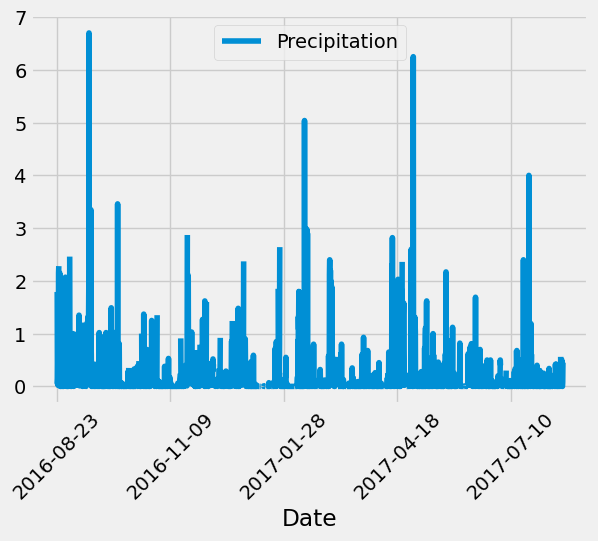

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
one_year_prior = dt.date(2017,8,23) - dt.timedelta(days=365)
one_year_prior

# Perform a query to retrieve the data and precipitation scores
one_year_data =session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_prior)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
one_year_data = pd.DataFrame(one_year_data, columns= ['Date', 'Precipitation'])
one_year_data

# Sort the dataframe by date
data_sorted = one_year_data.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
data_sorted.plot (x = 'Date', y = 'Precipitation', rot = 45)


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
data_sorted.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
#num_stations = session.query(Station).count()
#num_stations
num_stations = session.query(func.count(Station.station)).all()
num_stations 

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_count = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).filter(Measurement.station == 'USC00519281')
most_active = pd.DataFrame(most_active)

min_temp = most_active["tobs"].min()
min_temp

max_temp = most_active["tobs"].max()
max_temp

avg_temp = most_active["tobs"].mean()
avg_temp

71.66378066378067

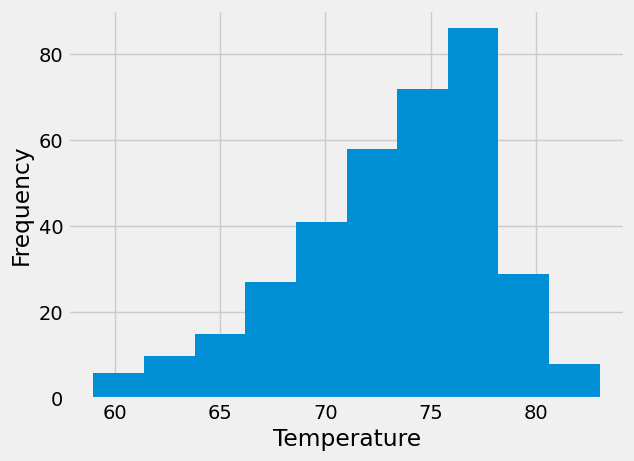

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_one_year = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).filter(Measurement.station == 'USC00519281', Measurement.date >= one_year_prior)
most_active_one_year
most_active_one_year= pd.DataFrame(most_active_one_year)
most_active_one_year

plt.hist(most_active_one_year["tobs"])
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


# Close Session

In [16]:
# Close Session
session.close()